In [ ]:
#######################################################################
################## MSDS 458 - Assignment 1 ############################
################## Author: Shawn Liu ##################################
#######################################################################

In [ ]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Model Measurement Function Definition**

In [ ]:
#accuracy
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
#plot confusion matrix (type I and II error)
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

**Load MNIST Digits Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Data Exploration - EDA Traning and Testing Sets**

In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [ ]:
print("first 20 labels of training data:\n {}\n".format(y_train[:20]))

first 20 labels of training data:
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]



In [ ]:
### quick check on label data distribution by class

Counter(y_train).most_common()

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

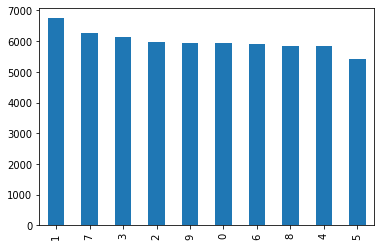

In [ ]:
df_y_train = pd.DataFrame(y_train, columns=['label'])
df_fre = df_y_train['label'].value_counts()
df_fre.plot.bar()

# 1 has highest number, while 5 has lowest number, but overall evenly distributed

In [ ]:
Counter(y_test).most_common()

[(1, 1135),
 (2, 1032),
 (7, 1028),
 (3, 1010),
 (9, 1009),
 (4, 982),
 (0, 980),
 (8, 974),
 (6, 958),
 (5, 892)]

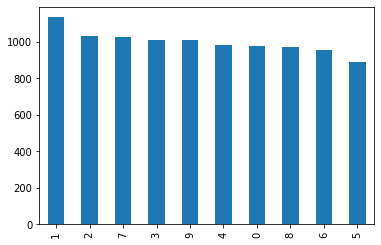

In [ ]:
df_y_test = pd.DataFrame(y_test, columns=['label'])
df_fre_test = df_y_test['label'].value_counts()
df_fre_test.plot.bar()

#distribution is similar to training dataset

**plot digit image**

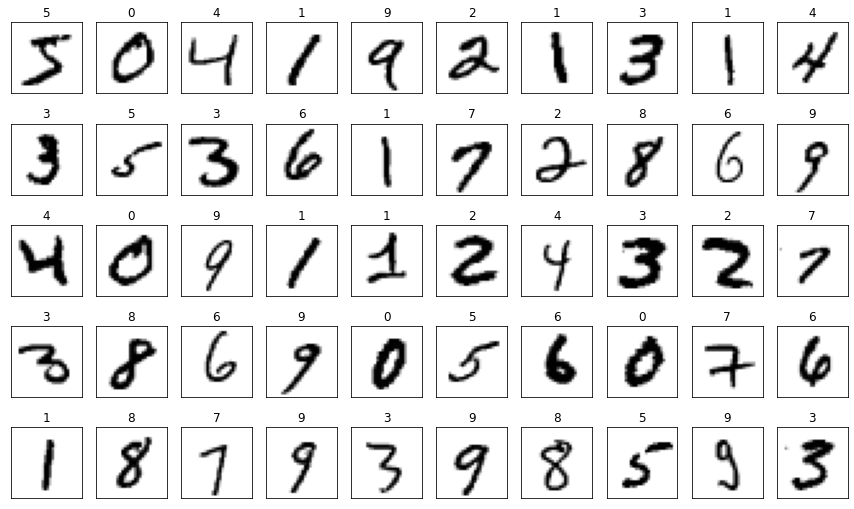

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

**Preprocessing Data**

In [ ]:
###preprocessing the data
###1. labels are to be converted with-one hot encoding
###2. features array are to be reshaped from (28, 28) to (784,)

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [ ]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[1000])) #1000 is arbitrarily picked

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   1   0   0  12 25

In [ ]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)


x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
print(set(x_train_reshaped[10]))

{0, 1, 128, 6, 7, 8, 137, 138, 139, 11, 141, 140, 18, 146, 19, 24, 25, 28, 31, 34, 164, 36, 166, 165, 40, 41, 42, 171, 177, 50, 51, 180, 239, 57, 63, 66, 197, 70, 73, 206, 207, 209, 210, 81, 84, 213, 214, 215, 89, 90, 219, 91, 93, 222, 224, 103, 232, 104, 105, 236, 238, 110, 112, 240, 242, 241, 244, 116, 118, 247, 246, 117, 250, 253, 254}


**Normalize the value per pixel**

In [ ]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [ ]:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


# **Experiment 1. DNN Model**

In [ ]:
###use Keras to compile DNN model. 

model = Sequential ([
    Dense(input_shape = [784], units=128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


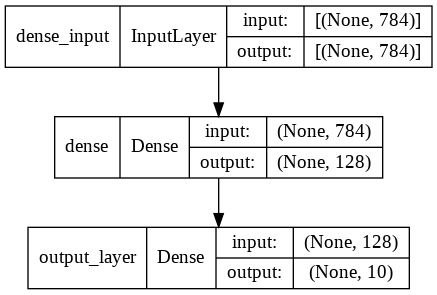

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 11s 6ms/step - loss: 0.4053 - accuracy: 0.9138 - val_loss: 0.2508 - val_accuracy: 0.9526
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2400 - accuracy: 0.9520 - val_loss: 0.2031 - val_accuracy: 0.9617
Epoch 3/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2002 - accuracy: 0.9603 - val_loss: 0.1881 - val_accuracy: 0.9630
Epoch 4/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1821 - accuracy: 0.9640 - val_loss: 0.1716 - val_accuracy: 0.9682
Epoch 5/200
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1704 - accuracy: 0.9672 - val_loss: 0.1798 - val_accuracy: 0.9646
Epoch 6/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1611 - accuracy: 0.9684 - val_loss: 0.1640 - val_accuracy: 0.9659
Epoch 7/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1569 - accuracy: 0.9691 - val_loss: 0.1593 - val_a

In [ ]:
###model evaluation

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1618 - accuracy: 0.9673
test set accuracy:  96.72999978065491


In [ ]:
### making predictions

preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


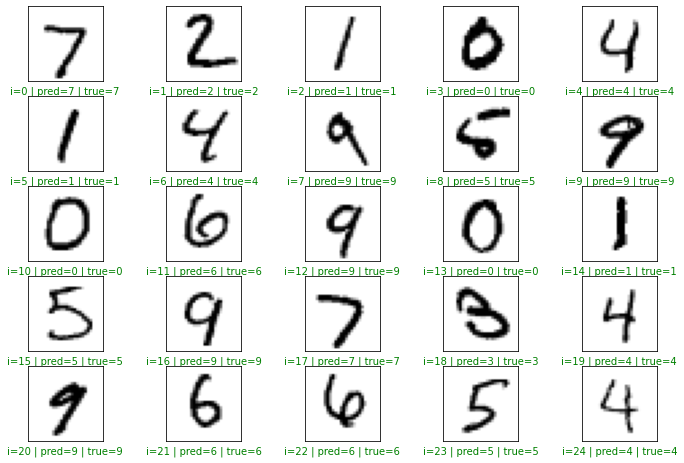

In [ ]:
###Look at the first 25 - Plot test set images along with their predicted and actual labels to understand how the trained model actually performed

plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])   ###np.argmax returns the indices of the maximum values along an axis, which is the digit class with highest possibility
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

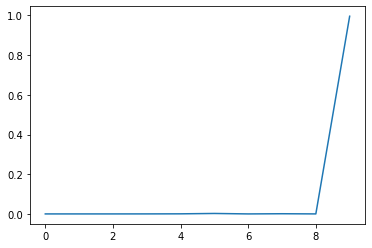

actual is 9


In [ ]:
index = 20

plt.plot(preds[index])
plt.show()

print('actual is {}'.format(np.argmax(y_test_encoded[index])))

In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

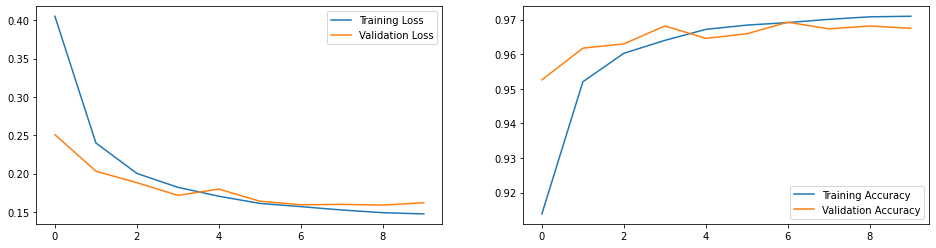

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
pred1= model.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

In [ ]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.92      0.99      0.95      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.94      0.96      1028
           8       0.95      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy Score: 0.9673
Root Mean Square Error: 0.7778817390837761


In [ ]:
###create confusion matrix

pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes;

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [ ]:
#visualize the prediction result
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.03%,0.00%,0.00%,0.00%,99.96%,0.00%,0.00%
1,0.00%,0.00%,99.87%,0.03%,0.00%,0.00%,0.00%,0.00%,0.10%,0.00%
2,0.00%,99.28%,0.08%,0.07%,0.09%,0.03%,0.02%,0.16%,0.27%,0.02%
3,99.98%,0.00%,0.01%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.85%,0.00%,0.00%,0.00%,0.00%,0.14%
5,0.00%,99.85%,0.00%,0.02%,0.02%,0.00%,0.00%,0.08%,0.03%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.87%,0.00%,0.00%,0.00%,0.02%,0.11%
7,0.00%,0.00%,0.08%,3.46%,1.38%,0.99%,0.00%,0.38%,0.33%,93.38%
8,0.00%,0.00%,0.34%,0.00%,0.08%,57.11%,42.45%,0.00%,0.01%,0.01%
9,0.00%,0.00%,0.00%,0.00%,0.32%,0.00%,0.00%,0.00%,0.01%,99.66%


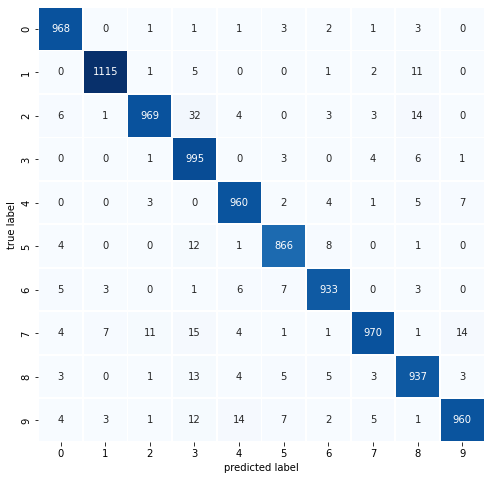

In [ ]:
#visualize the confusion matrix

plot_confusion_matrix(y_test,pred_classes)

15 threes are misclassified as 2, 22 nines are misclassified as 4, 18 sevens miscalssified as 9

In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

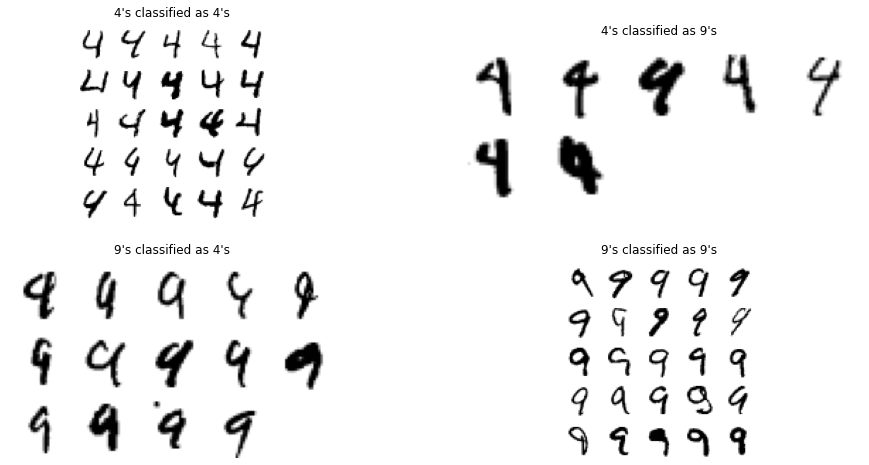

In [ ]:
cl_a, cl_b = 4, 9
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]# misclassified 
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]# misclassified
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

#**Analyzing the Activation Values of the Hidden Nodes**

We want to examine the contribution of the individual hidden nodes to the classifications made by the model. We first get the activation values of all the hidden nodes for each of the 60,000 training images and treat these 128 activations as the features that determine the classification class. For the sake of comparison, we also consider the 784 pixels of each training image and determine the contribution of the individual pixels to the predicted classification class.

Our goal is to use box and scatter plots to visualize how these features (pixel and activation values) correlate with the class labels. Because of the high dimension of the feature spaces, we apply PCA decomposition and t-Distributed stochastic neighbor embedding (t-SNE) to reduce the number of features in each case.

1) Raw data is 60,000 X 784. Just do a scatter plot of col 1 vs col 2. Overlay the color coded classes. We should not see any patterns since there is not much info in 2 cols to discriminate.

2) PCA of raw data – as we discussed earlier. Plot PC1 vs PC2 with overlay. This should be ‘better’ since these 2 capture the info from all 784 cols.

3) PCA of activation values – as we discussed earlier. This should be ‘better’ than the previous 2 since it has captured specific features of discrimination.

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0] ###the 128 nodes hidden layer
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 128)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 5.684934139251709


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.    0.    0.    0.344 0.    0.656 0.    0.    0.    0.   ]
The sum of the probabilities is (approximately) 1.0000001192092896


In [ ]:
###create matrix, with activation values and class labels

#Get the dataframe of all the node values
activation_data = {'actual_class':y_train} #initiate dictionary with actual label as 1st element 
for k in range(0,128): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k] #The string itself can be formatted in much the same way that you would with str.format()

#hidden_layer_activation[:,k] returns the vector of one specific neuron in hidden layer for all instances

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,1.054,0.090,0.000,0.000,0.000,0.000,0.223,0.281,0.067,0.000,0.825,0.000,1.921,0.000,0.152
act_val_1,0.312,0.000,0.000,0.000,0.000,0.006,0.000,0.418,0.000,0.000,0.000,0.000,0.000,2.077,0.000
act_val_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.666,0.000,0.537,0.000,0.101,0.000
act_val_3,0.000,0.554,0.000,0.468,0.000,0.044,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.263,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
act_val_123,0.185,0.000,0.000,0.945,0.000,0.000,0.922,0.000,0.971,0.675,0.000,0.357,0.000,0.858,1.386
act_val_124,0.067,0.000,0.000,0.344,0.530,0.000,0.819,0.812,0.661,0.213,0.998,0.000,1.422,0.000,0.721
act_val_125,0.447,2.105,0.631,0.000,0.000,0.000,0.000,0.462,0.000,0.000,0.000,0.000,0.000,0.000,0.000
act_val_126,0.770,2.340,0.000,0.000,0.459,0.000,0.000,0.054,0.000,0.000,0.000,0.000,0.000,0.302,0.000


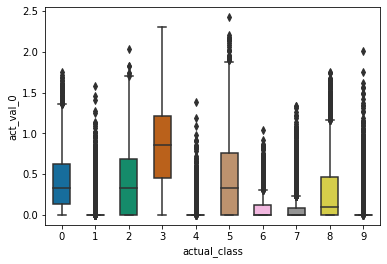

In [ ]:
### visualize activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

 #https://stackoverflow.com/questions/47551251/python-pandas-groupby-apply-lambda-arguments

,actual_class,range_of_act_values
0,0,"[0.0, 1.76]"
1,1,"[0.0, 1.58]"
2,2,"[0.0, 2.03]"
3,3,"[0.0, 2.31]"
4,4,"[0.0, 1.39]"
5,5,"[0.0, 2.42]"
6,6,"[0.0, 1.04]"
7,7,"[0.0, 1.34]"
8,8,"[0.0, 1.75]"
9,9,"[0.0, 2.01]"


In [ ]:
#Create a dataframe with the pixel values and class labels

#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,128): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k] #get the first 128 pixel for all samples
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.000,3.0,1.0,4.0,3.000,5.0,3.0,6.000,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_123,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.165,0.0,0.0,0.000,0.0
pix_val_124,0.0,0.0,0.0,0.0,0.0,0.0,0.569,0.0,0.0,0.0,0.463,0.0,0.0,0.000,0.0
pix_val_125,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.859,0.0,0.0,0.090,0.0
pix_val_126,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.0,0.0,0.0,0.651,0.0,0.0,0.773,0.0


In [ ]:
pixel_df.pix_val_77.value_counts()

0.000000    59720
1.000000       25
0.996078       13
0.992157        9
0.050980        6
            ...  
0.392157        1
0.717647        1
0.215686        1
0.925490        1
0.937255        1
Name: pix_val_77, Length: 150, dtype: int64

In [ ]:
pixel_df.pix_val_78.value_counts()

0.000000    59862
1.000000        6
0.141176        4
0.960784        4
0.992157        4
            ...  
0.749020        1
0.717647        1
0.345098        1
0.968627        1
0.654902        1
Name: pix_val_78, Length: 97, dtype: int64

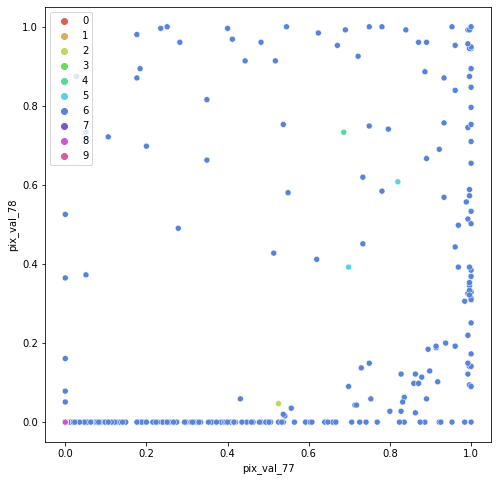

In [ ]:
#Use a scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image, i.e. how well the pixel values at two fixed locations in the image "predict" the class labels.

plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="pix_val_77", y="pix_val_78", hue="actual_class",  palette=color, data = pixel_df, legend="full")
plt.legend(loc='upper left');
##we can tell that the two pixels do not have a good prediction power on the label identification

#**PCA Feature Reduction / Model Optimization**

**1. Use PCA decomposition to reduce the number of features from 784 features to features**

In [ ]:
# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...] --》 return only the dictionary keys from second to last
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)
pixel_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,-0.332,0.035,5
1,-0.246,-0.044,0
2,-0.332,0.035,4
3,-0.332,0.035,1
4,-0.332,0.035,9


In [ ]:
pca.explained_variance_ratio_

array([0.403, 0.164], dtype=float32)

Use PCA decomposition to reduce the number of features from 784 features to 2 features

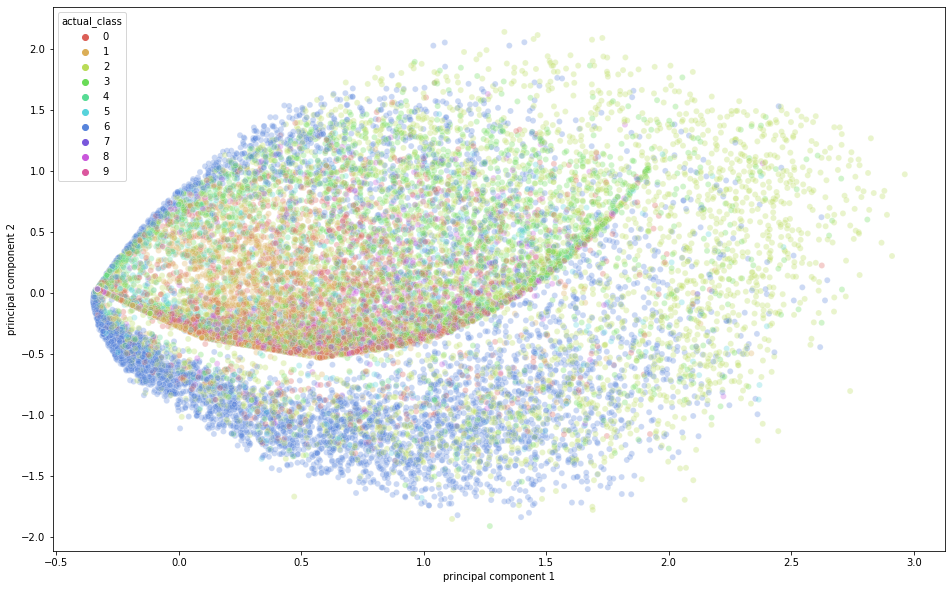

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

**2. Use PCA decomposition to reduce the activation features from 128 (=num of hidden nodes) to 2**

In [ ]:
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...] --》 return only the dictionary keys from second to last
x = activation_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head().round(3)

,principal component 1,principal component 2
0,0.576,-2.676
1,4.152,0.391
2,-0.591,1.996
3,-1.923,-0.833
4,-2.297,0.901


In [ ]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,0.576,-2.676,5
1,4.152,0.391,0
2,-0.591,1.996,4
3,-1.923,-0.833,1
4,-2.297,0.901,9


In [ ]:
pca.explained_variance_ratio_

array([0.184, 0.126], dtype=float32)

In [ ]:
total_var = np.sum(pca.explained_variance_ratio_)

print("the two principal components explain {} variance in total".format(total_var))

the two principal components explain 0.3094024062156677 variance in total


Use a scatter plot to visualize the predictive power of two principal component value - activation nodes

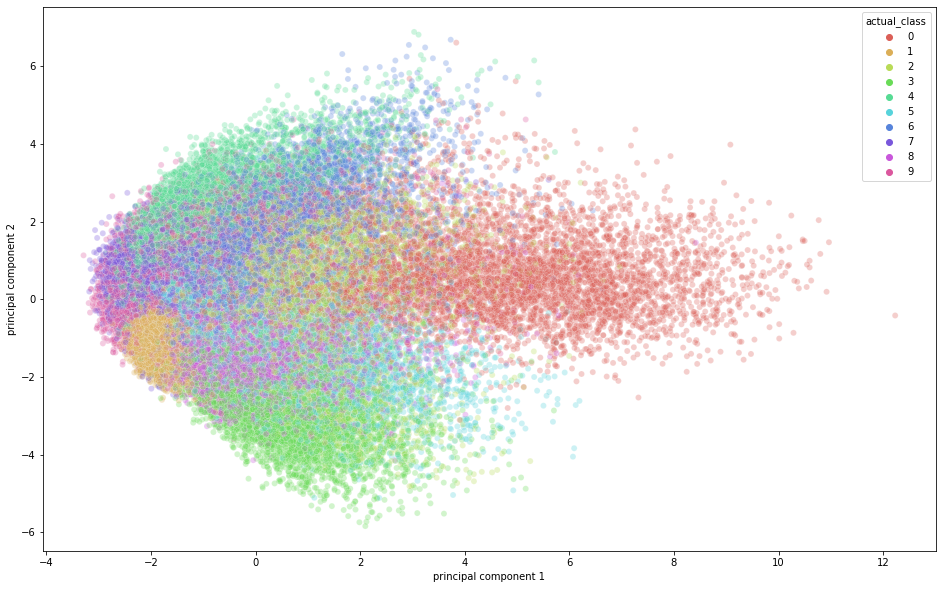

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=activation_pca_df,
    legend="full",
    alpha=0.3
);

#we can tell the 10 classes are more separatable after being converted to 128 hidden nodes

**3. Use PCA decomposition to reduce the (activation) features from 128 (= num of hidden nodes) to 3**

In [ ]:
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...] --》 return only the dictionary keys from second to last
x = activation_df.loc[:, features].values 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca_one', 'pca_two', 'pca_three'])
principalDf.head(10).round(3).T

,0,1,2,3,4,5,6,7,8,9
pca_one,0.576,4.152,-0.591,-1.923,-2.297,-0.795,-1.594,0.991,-2.035,-1.872
pca_two,-2.676,0.391,1.996,-0.833,0.901,1.082,-1.638,-3.572,-0.845,2.122
pca_three,-0.017,-2.173,0.825,-1.134,1.498,-1.447,-0.611,0.792,-0.606,-0.498


In [ ]:
pca.explained_variance_ratio_

array([0.184, 0.126, 0.101], dtype=float32)

In [ ]:
total_var = np.sum(pca.explained_variance_ratio_)

print("the two principal components explain {} variance in total".format(total_var))

the two principal components explain 0.4102764427661896 variance in total


In [ ]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

,pca_one,pca_two,pca_three,actual_class
0,0.576,-2.676,-0.017,5
1,4.152,0.391,-2.173,0
2,-0.591,1.996,0.825,4
3,-1.923,-0.833,-1.134,1
4,-2.297,0.901,1.498,9


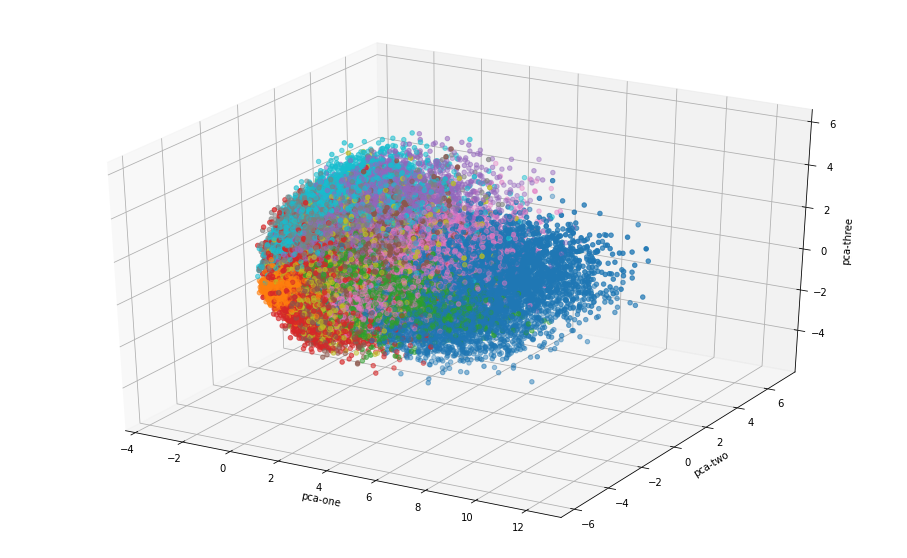

In [ ]:
#Use a scatter plot to visualize the predictive power of three principal component values

# uncomment to to able to rotate the graph...
# %matplotlib notebook   
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=activation_pca_df.loc[:,"pca_one"], 
    ys=activation_pca_df.loc[:,"pca_two"], 
    zs=activation_pca_df.loc[:,"pca_three"], 
    c=activation_pca_df.loc[:,"actual_class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

**4. Use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the (activation) features from 128 (= num of hidden nodes) to 2**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. This time we only use the first 10,000 training images (N=10000) since the technique is computationally expensive.

In [ ]:
N=60000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(60000, 129)

In [ ]:
data_subset = activation_df_subset[features].values  #only extract the activation nodes values from the df
data_subset.shape

(60000, 128)

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.009s...
[t-SNE] Computed neighbors for 60000 samples in 112.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

In [ ]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())

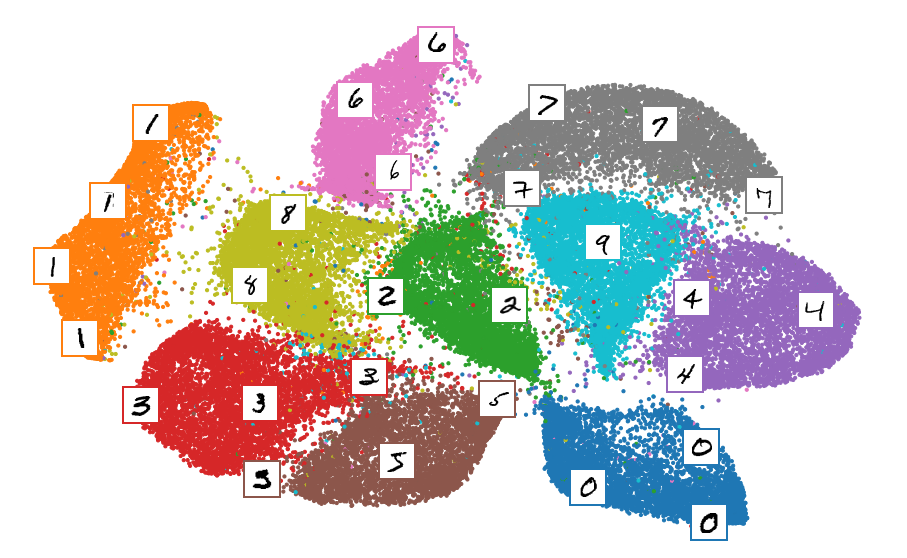

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y_train, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_train[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()


#**5. Reducing dimensionality of the data with Random Forests.**

We create a Random Forest Classifier (with the default 100 trees) and use it to find the relative importance of the 784 features (pixels) in the training set. We produce a heat map to visual the relative importance of the features (using code from Hands On Machine Learning by A. Geron). Finally, we select the 70 most important feature (pixels) from the training, validation and test images to test our 'best' model on.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
RandomForestClassifier(random_state=42)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

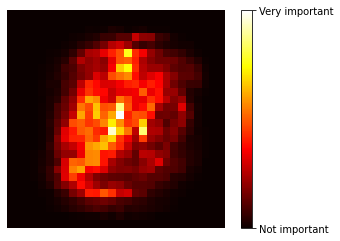

In [ ]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [ ]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels -》 argsort returns the index based on result in ascending order, so need to put - up in front
len(idx)

70

In [ ]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [ ]:
#visualize the selected 70 pixels

# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y
    #because both row num and column start with 0, x, y is right position

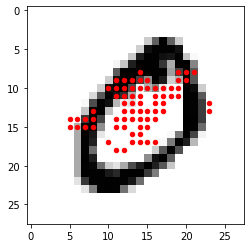

In [ ]:
plt.imshow(x_train_norm[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%%shell
jupyter nbconvert --to html /content/Assignment1_Experiment1_Liu.ipynb

[NbConvertApp] Converting notebook /content/Assignment1_Experiment1_Liu.ipynb to html
[NbConvertApp] Writing 3040862 bytes to /content/Assignment1_Experiment1_Liu.html
